# Naive Bayes

<h3> Import all the required libraries </h3>

In [2]:
#Import all the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,LabelEncoder

# EDA

In [4]:
df=pd.read_csv('SalaryData_Train.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#size of the overall dataset
df.shape

(30161, 14)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

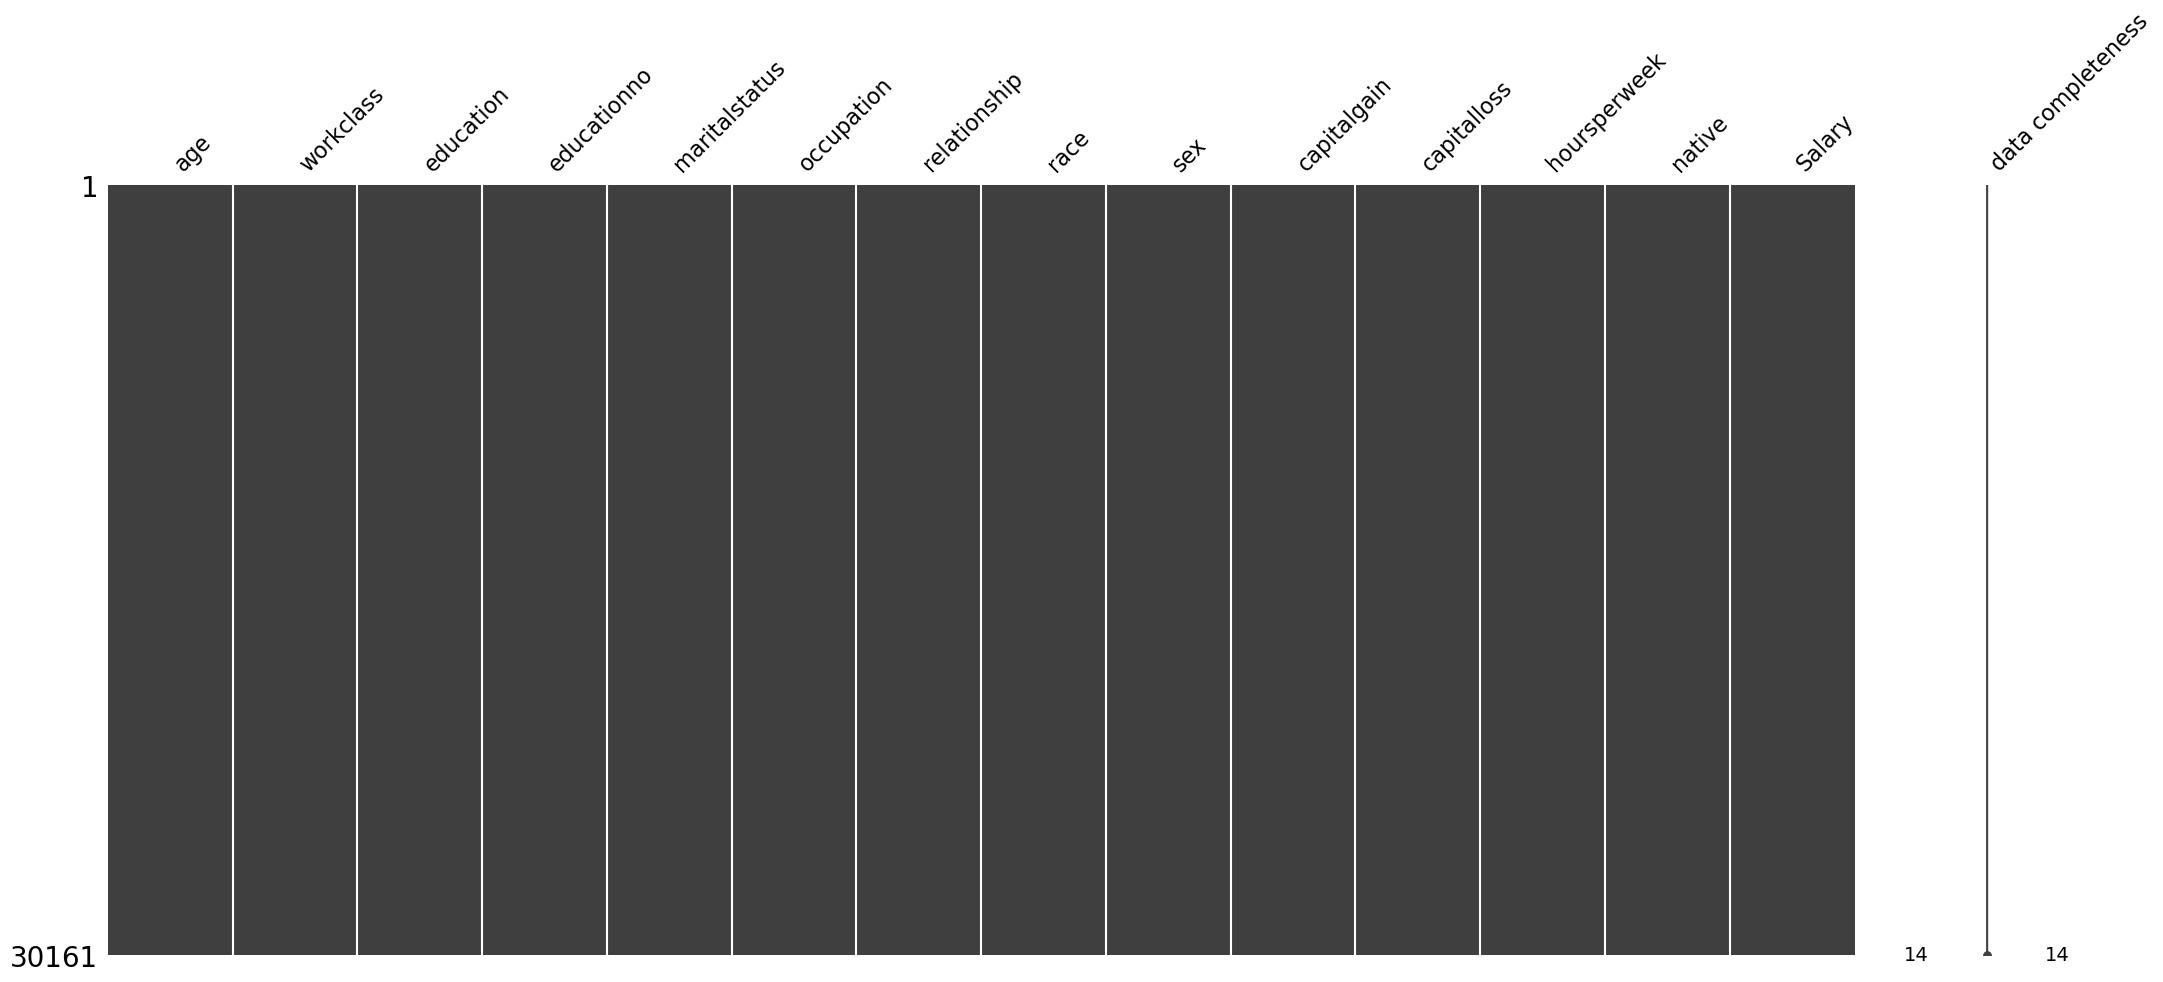

In [6]:
#finding null values
import missingno as msno

msno.matrix(df, labels=True, sort="descending");
df.isnull().sum()

In [7]:
#different datatypes in dataframe
df.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
#lets encode all those characters 

df['workclass']=LabelEncoder().fit_transform(df['workclass'])
df['education']=LabelEncoder().fit_transform(df['education'])
df['maritalstatus']=LabelEncoder().fit_transform(df['maritalstatus'])
df['occupation']=LabelEncoder().fit_transform(df['occupation'])
df['sex']=LabelEncoder().fit_transform(df['sex'])
df['native']=LabelEncoder().fit_transform(df['native'])
df['relationship']=LabelEncoder().fit_transform(df['relationship'])
df['race']=LabelEncoder().fit_transform(df['race'])
df['Salary']=LabelEncoder().fit_transform(df['Salary'])

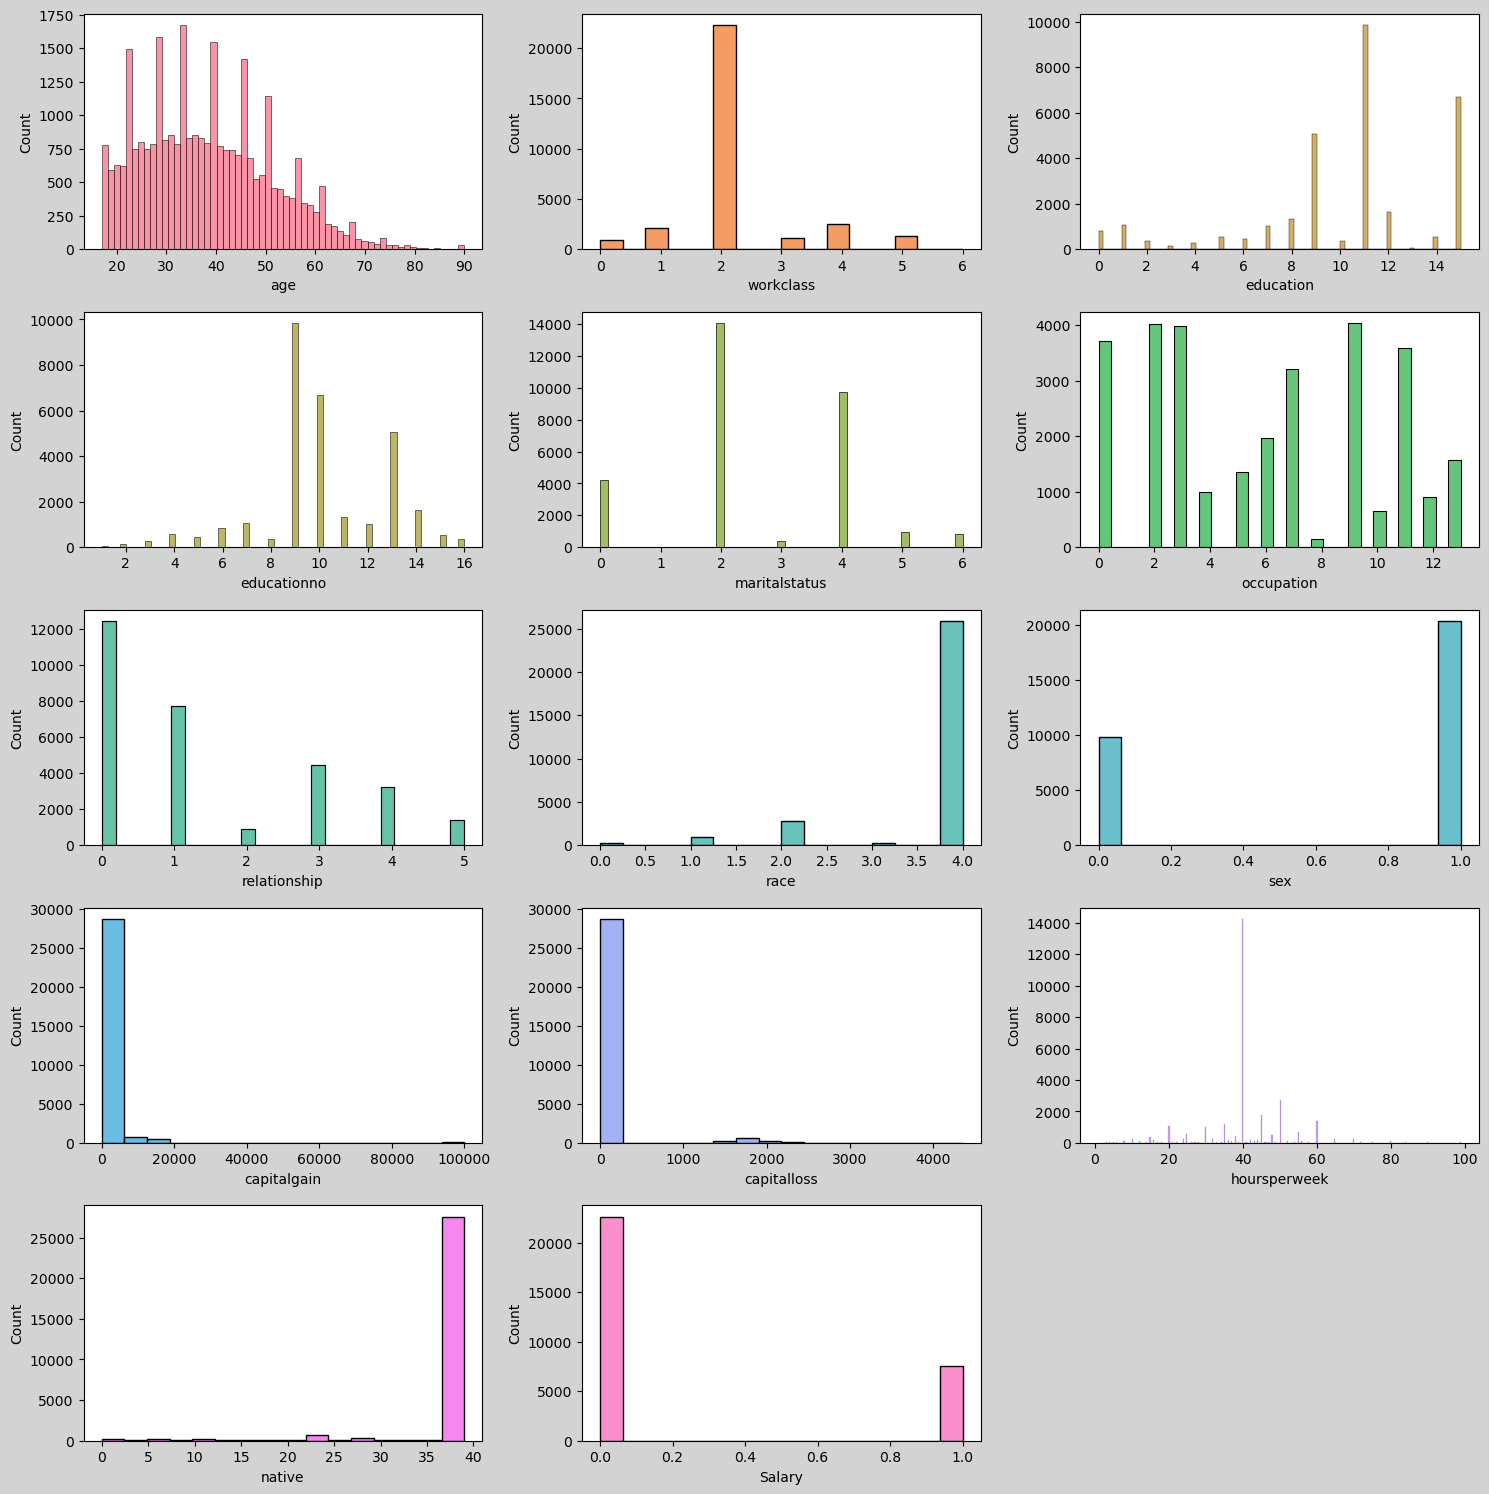

In [9]:
import matplotlib.pyplot as plt
c=3
r=5
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

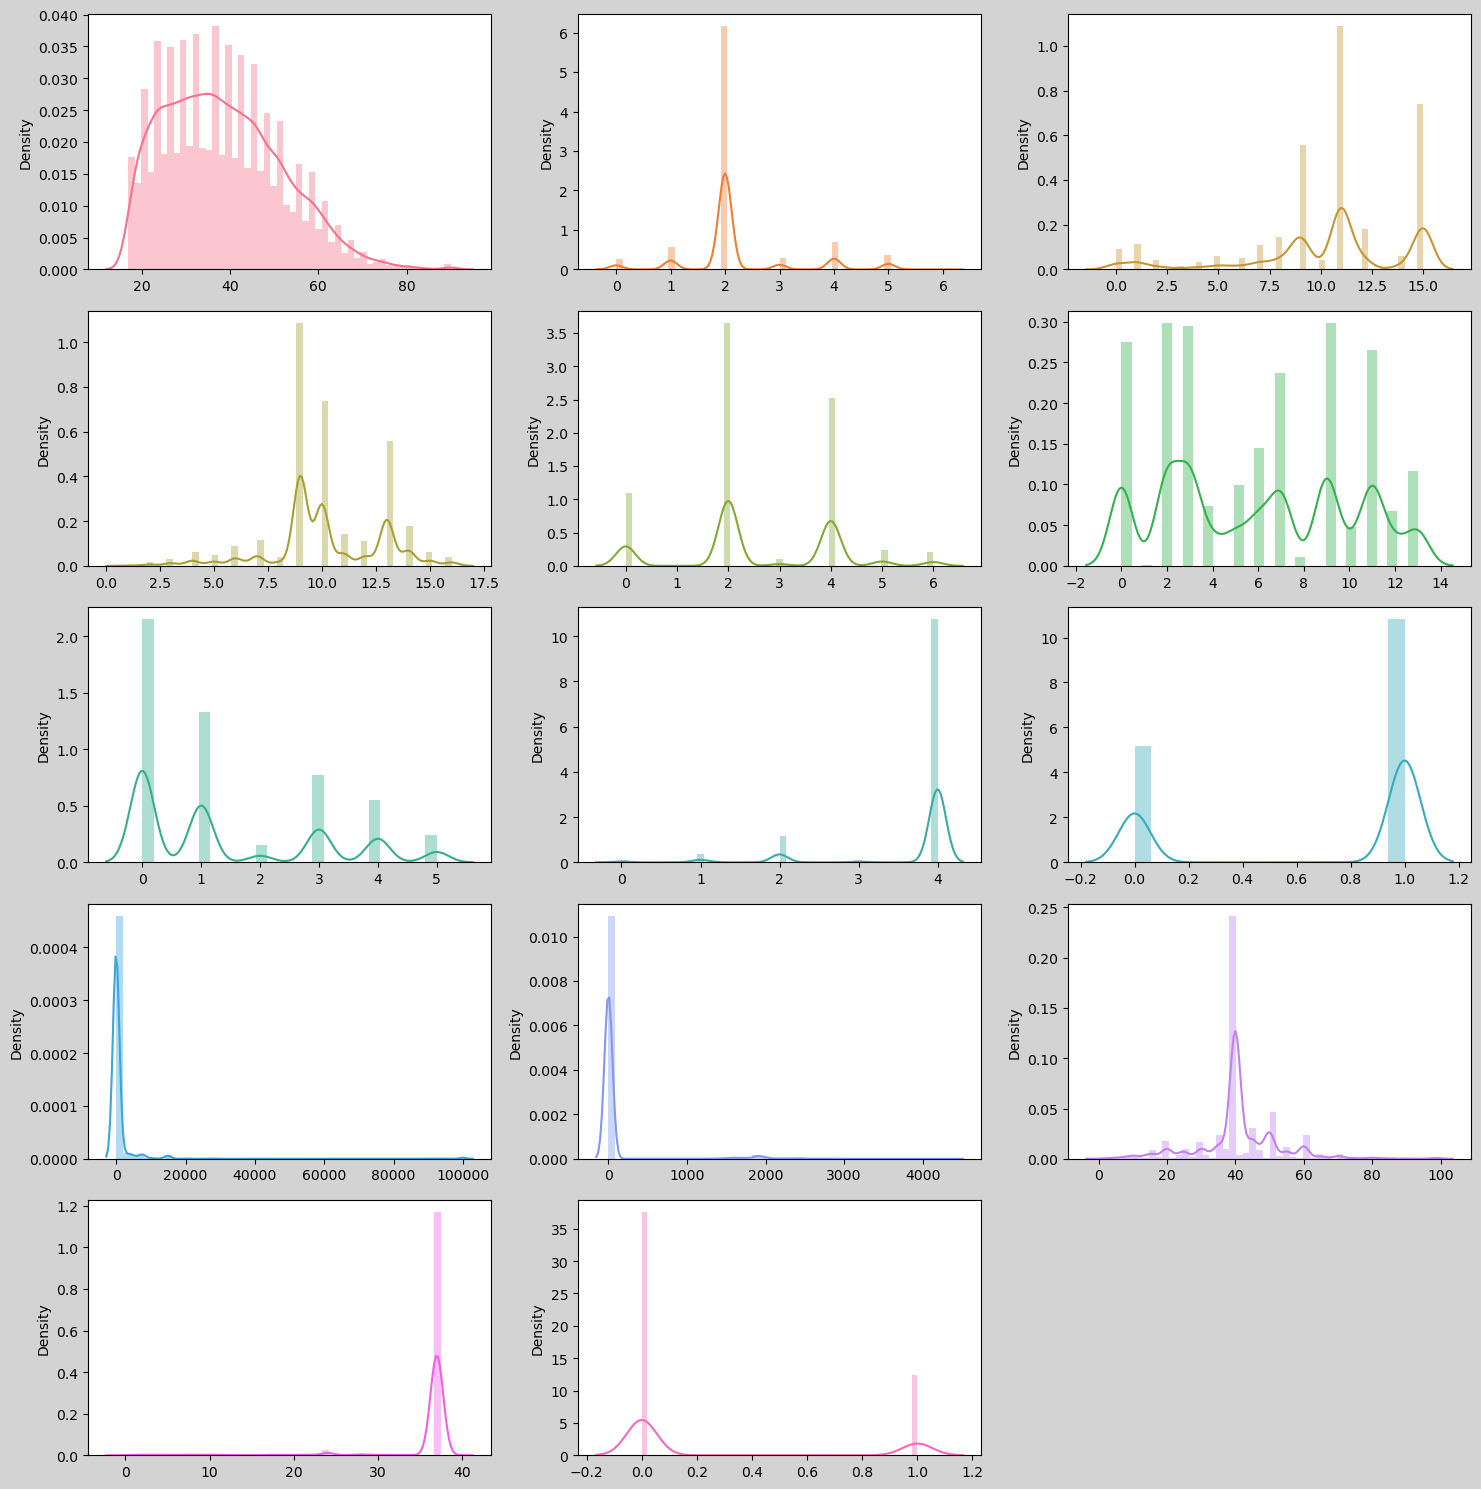

In [11]:
#performing univerent analysis
import warnings
warnings.filterwarnings('ignore')
c=3
r=5
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

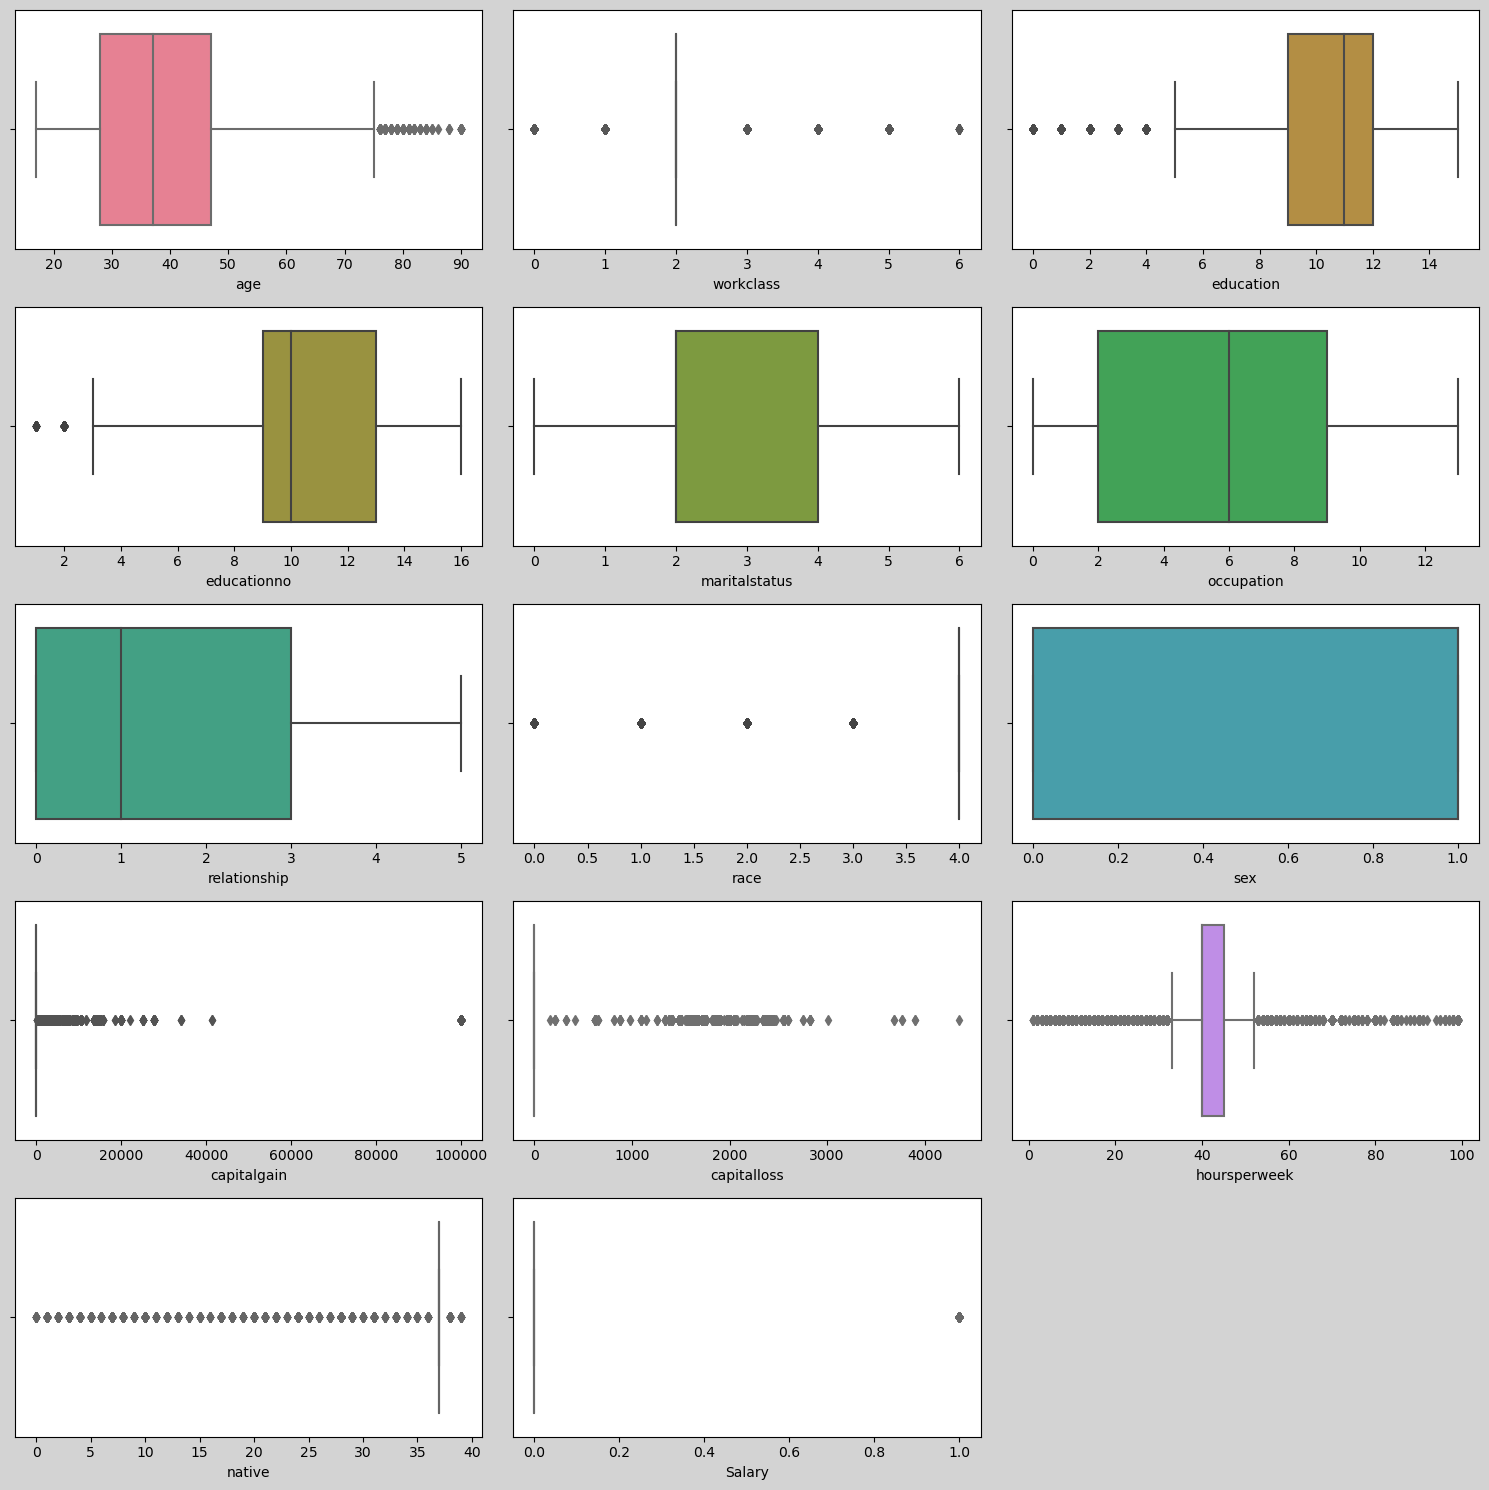

In [12]:
#performing univerent analysis
c=3
r=5
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548,0.241991
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598,0.018040
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715,0.079013
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625,0.335287
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057,-0.193504
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298,0.051577
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661,-0.250998
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507,0.071666
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063,0.216680
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513,0.221195


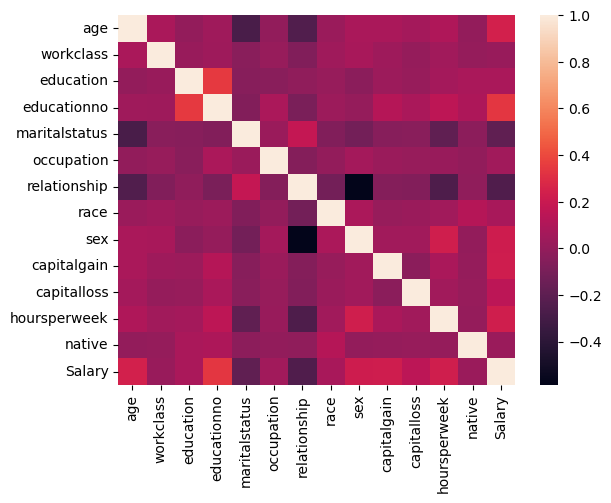

In [13]:
sns.heatmap(df.corr())
df.corr()

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
workclass,30161.0,2.199330,0.953940,0.0,2.0,2.0,2.0,6.0
education,30161.0,10.333610,3.812260,0.0,9.0,11.0,12.0,15.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
maritalstatus,30161.0,2.580087,1.498018,0.0,2.0,2.0,4.0,6.0
occupation,30161.0,5.959849,4.029633,0.0,2.0,6.0,9.0,13.0
relationship,30161.0,1.418322,1.601361,0.0,0.0,1.0,3.0,5.0
race,30161.0,3.678592,0.834721,0.0,4.0,4.0,4.0,4.0
sex,30161.0,0.675707,0.468118,0.0,0.0,1.0,1.0,1.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0


In [25]:
df['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

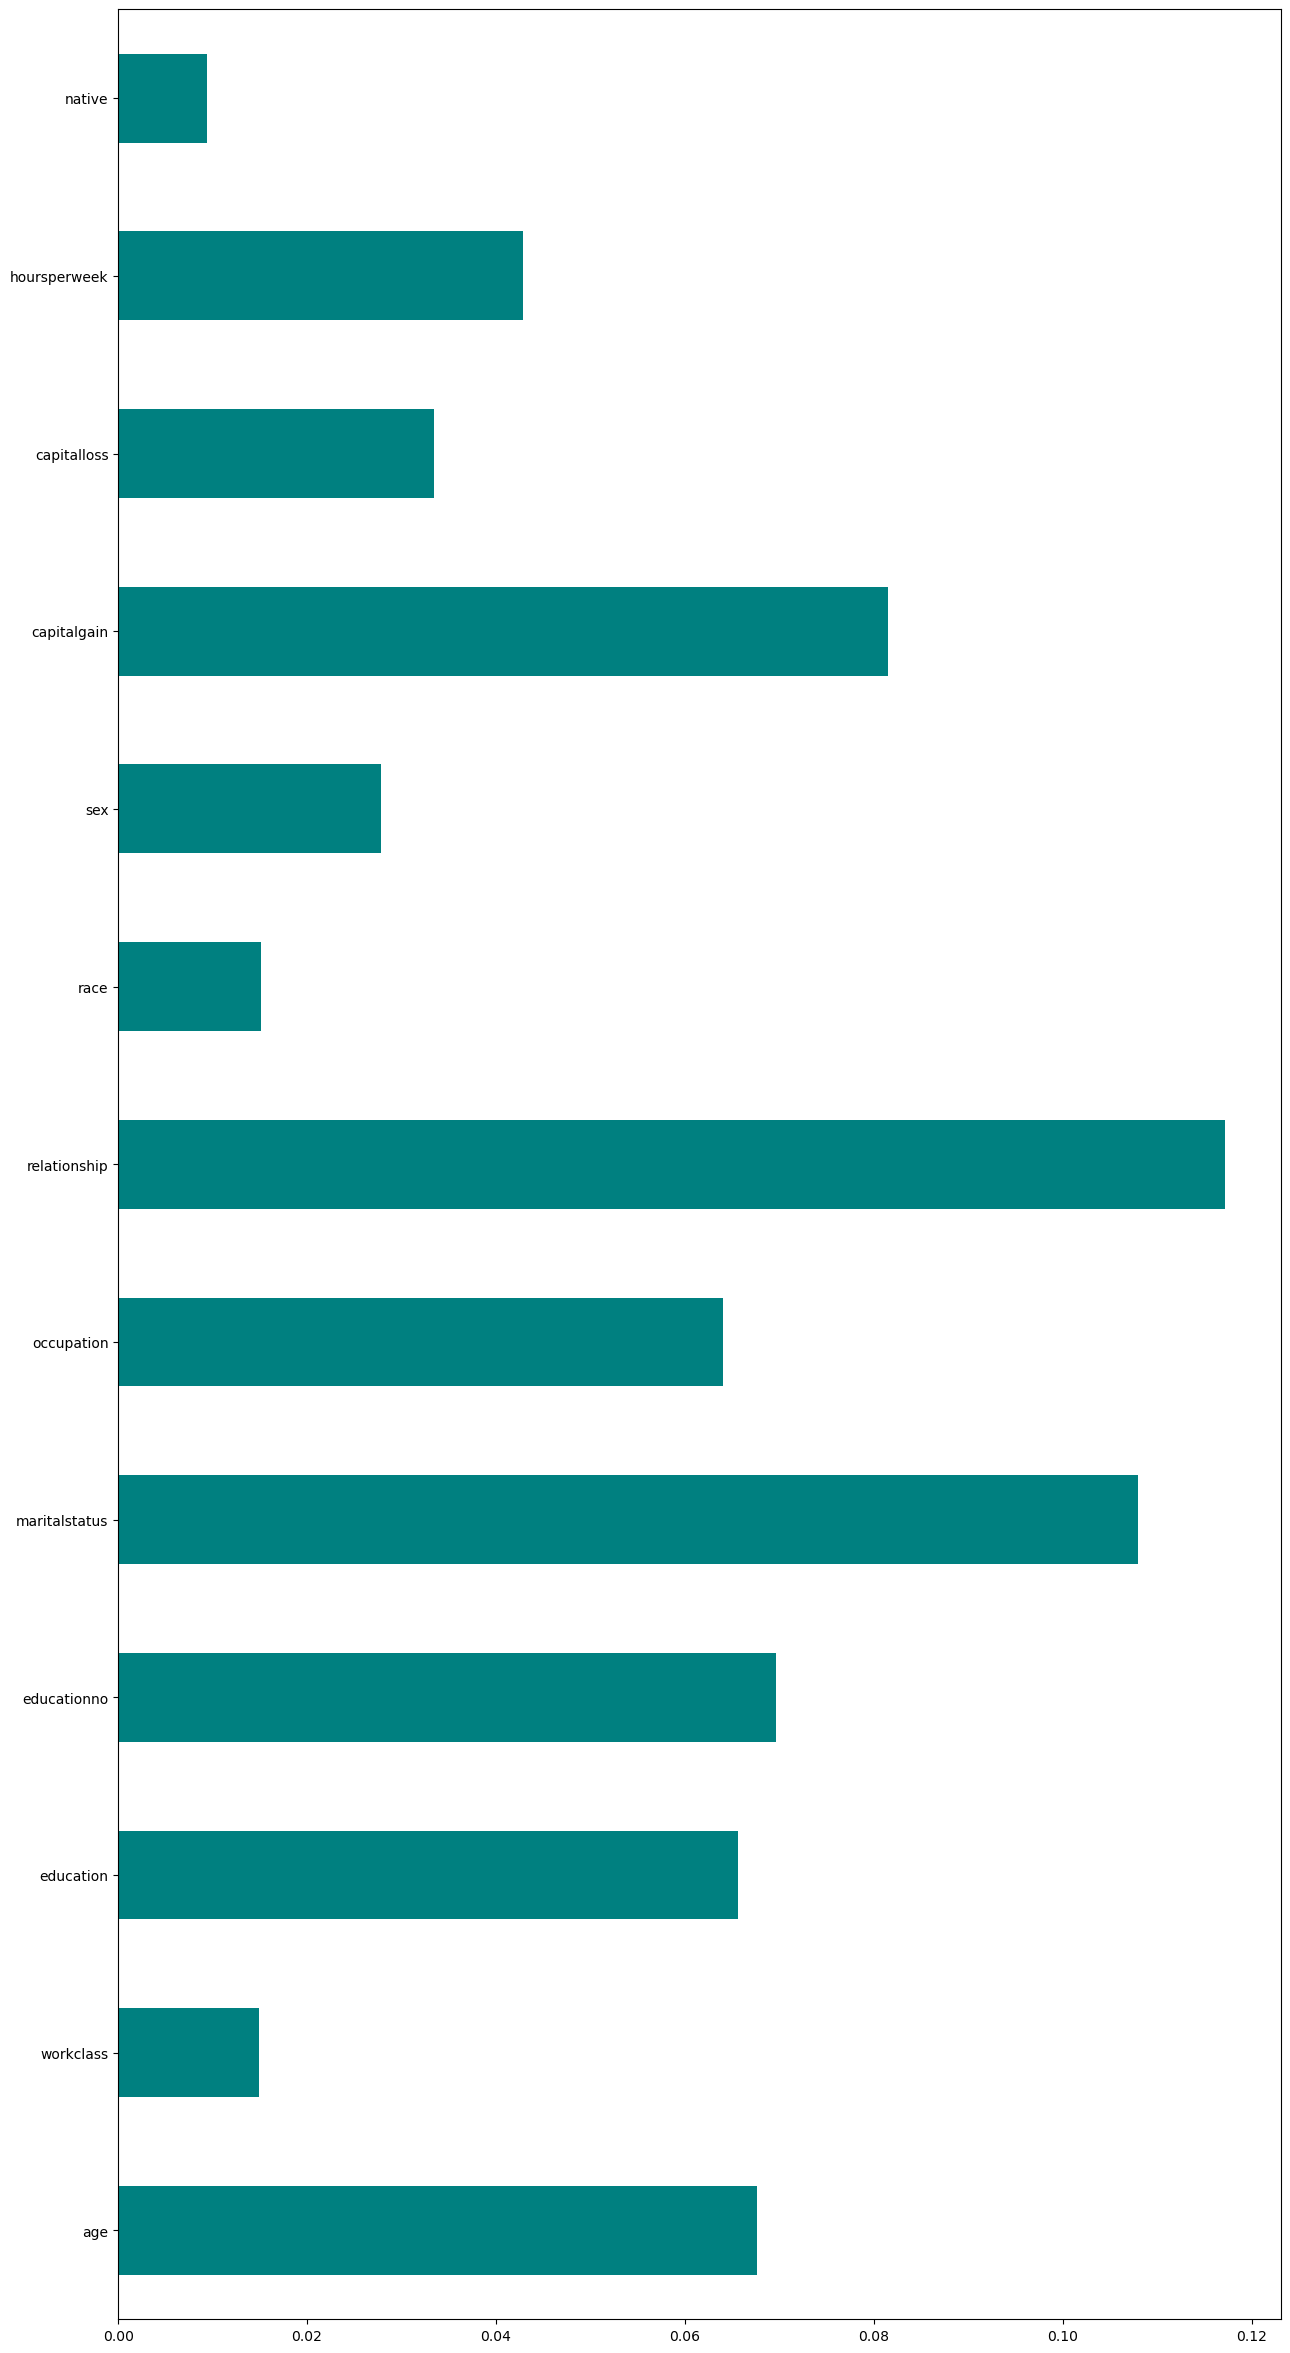

In [27]:
from sklearn.feature_selection import mutual_info_classif

plt.figure(figsize=(15,30))
importance=mutual_info_classif(x,y)
feat_imp=pd.Series(importance,df.columns[0:len(df.columns)-1])
feat_imp.plot(kind='barh',color='teal')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.3)

model=GaussianNB().fit(X_train,y_train)
ypred=model.predict(X_test)

from sklearn.metrics import accuracy_score
print('training accuracy of the model',accuracy_score(y_test,ypred))

training accuracy of the model 0.7904740855343132


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      6780
           1       0.67      0.32      0.43      2269

    accuracy                           0.79      9049
   macro avg       0.74      0.63      0.65      9049
weighted avg       0.77      0.79      0.76      9049



# over Sampling using SMOTE 

In [96]:
#data balancing should be done because data's are not distributed properly
#let me use oversampling techniques
from imblearn.over_sampling import SMOTE

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)
# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display new class distribution
pd.Series(y_resampled).value_counts()

0    18163
1    18163
Name: Salary, dtype: int64

In [97]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

model=GaussianNB().fit(X_resampled,y_resampled)
ypred=model.predict(X_test)

from sklearn.metrics import accuracy_score
print('training accuracy of the model',accuracy_score(y_test,ypred))

training accuracy of the model 0.8125310790651418


In [98]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4490
           1       0.71      0.46      0.55      1543

    accuracy                           0.81      6033
   macro avg       0.77      0.70      0.72      6033
weighted avg       0.80      0.81      0.80      6033



<AxesSubplot:>

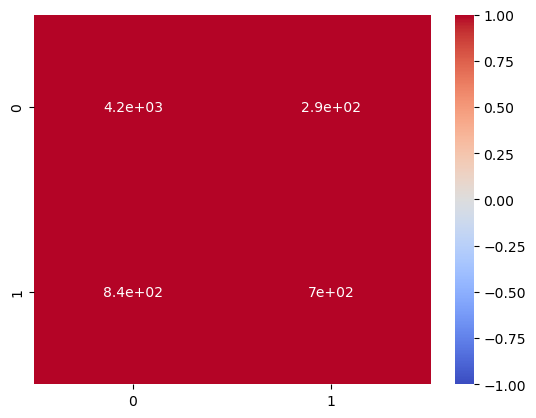

In [99]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,ypred), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

# SMOTEENN

In [100]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state = 42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

X_resampled.shape,y_resampled.shape

print(f'size of 0th class  {len(y_resampled[y_resampled==0])}')
print(f'size of 1st class  {len(y_resampled[y_resampled==1])}')

size of 0th class  12520
size of 1st class  13444


In [101]:
model=GaussianNB().fit(X_resampled,y_resampled)
ypred=model.predict(X_test)

from sklearn.metrics import accuracy_score
print('training accuracy of the model',accuracy_score(y_test,ypred))

training accuracy of the model 0.8184982595723521


In [102]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4490
           1       0.68      0.54      0.60      1543

    accuracy                           0.82      6033
   macro avg       0.77      0.73      0.74      6033
weighted avg       0.81      0.82      0.81      6033



<AxesSubplot:>

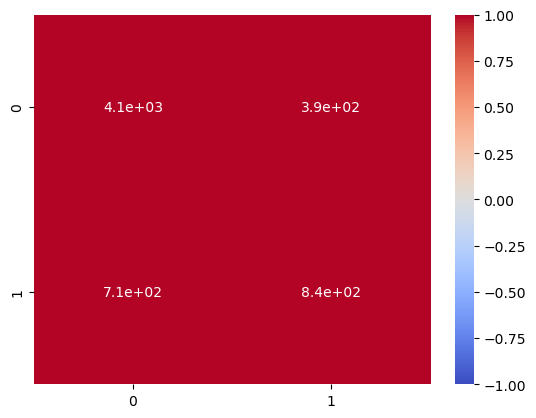

In [103]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,ypred), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

# ADASYN

In [104]:
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state = 42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train.ravel())

X_resampled.shape, y_resampled.shape

print(f'size of 0th class  {len(y_resampled[y_resampled==0])}')
print(f'size of 1st class  {len(y_resampled[y_resampled==1])}')

size of 0th class  18163
size of 1st class  17503


In [105]:
model=GaussianNB().fit(X_resampled,y_resampled)
ypred=model.predict(X_test)

from sklearn.metrics import accuracy_score
print('training accuracy of the model',accuracy_score(y_test,ypred))

training accuracy of the model 0.8186640145864412


In [106]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4490
           1       0.68      0.55      0.61      1543

    accuracy                           0.82      6033
   macro avg       0.77      0.73      0.75      6033
weighted avg       0.81      0.82      0.81      6033



<AxesSubplot:>

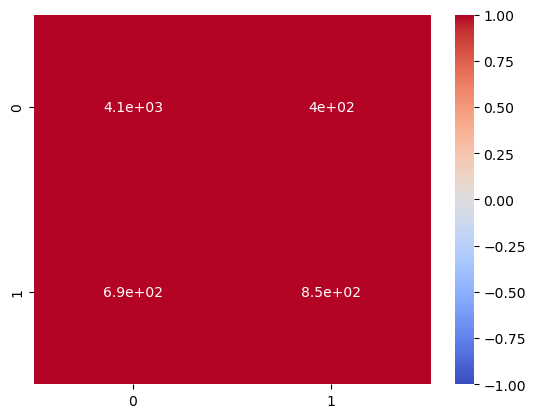

In [107]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix

sns.heatmap(confusion_matrix(y_test,ypred), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')